In [1]:
import numpy as np
import os
import pandas as pd
from pandas import ExcelWriter
import matplotlib.pyplot as plt
import openpyxl
#%matplotlib notebook

#import matplotlib as mpl
#mpl.rcParams['mathtext.fontset'] = 'stix'
#mpl.rcParams['font.size'] = 22
#mpl.rcParams['font.family'] = 'STIXGeneral'

from Cores import Cores

In [2]:
coreNames = ['B16', 'B17','B18','B19','B20','B21','B22','B23','B26','B27','B28','B29','B30']
DEPy = [False,False,True,True,True,False,True,True,False,False,False,False,False]
ECMy = [True,False,True,False,False,True,False,False,False,False,False,False,False]
idx = [3,6,7]
DEP_Names = ['B18','B19','B20','B22','B23']
ECM_Names = ['B16','B18','B21']
ECM_DEPCores = []

for i in idx:
    coreName = coreNames[i]
    dens = pd.read_excel('DepthDensity_Bcores_lowRes.xlsx', sheet_name=coreName, index=False)
    d18O = pd.read_excel('Depth_d18O__Bcores.xlsx', sheet_name=coreName, index=False)
    
    if DEPy[i]:
        DEP = pd.read_excel('DepthDEP__BcoresClean.xlsx', sheet_name=coreName, index=False)
    else:
        DEP = []
    
    if ECMy[i]:
        ECM = pd.read_excel('DepthECM__B16_B18_B21.xlsx', sheet_name=coreName, index=False)
    else:
        ECM = []
    
    volcWE = np.asarray(pd.read_excel('VolcanicEruptions__WE_Depth.xlsx', 'Sheet1', usecols=[coreName]))
    ECM_DEPCores.append(Cores(name=coreName, df_dens=dens, df_d18O = d18O, df_ECM = ECM, df_DEP = DEP, volcWE = volcWE))

    
#coreName = 'B21'
#name1 = coreName
#df_dens1 = pd.read_excel('DepthDensity_Bcores_lowRes.xlsx', sheet_name=coreName, index=False)
#df_d18O1 = pd.read_excel('Depth_d18O__Bcores.xlsx', sheet_name=coreName, index=False)
#df_ECM1 = pd.read_excel('DepthECM__B16_B18_B21.xlsx', sheet_name=coreName, index=False)
#df_DEP1 = []#pd.read_excel('DepthDEP__BcoresClean.xlsx', sheet_name=coreName, index=False)
#volcWE1 = np.asarray(pd.read_excel('VolcanicEruptions__WE_Depth.xlsx', 'Sheet1', usecols=[coreName]))

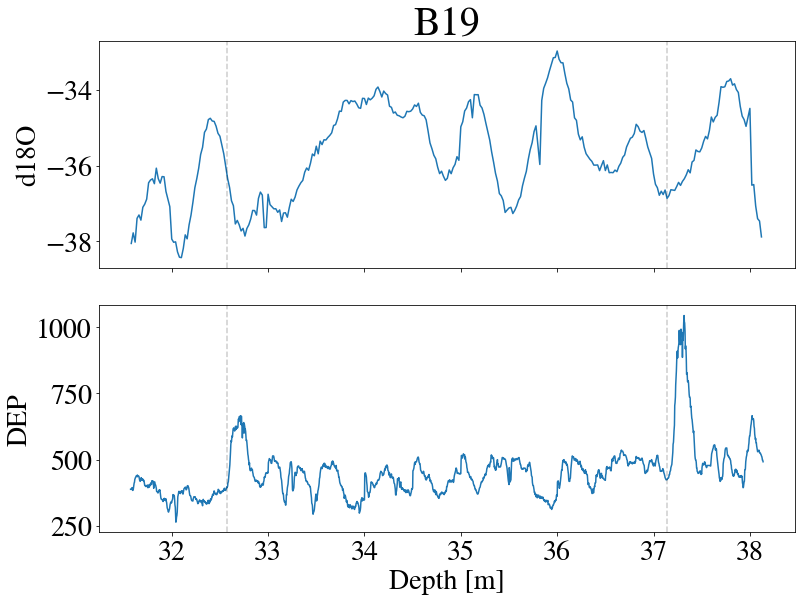

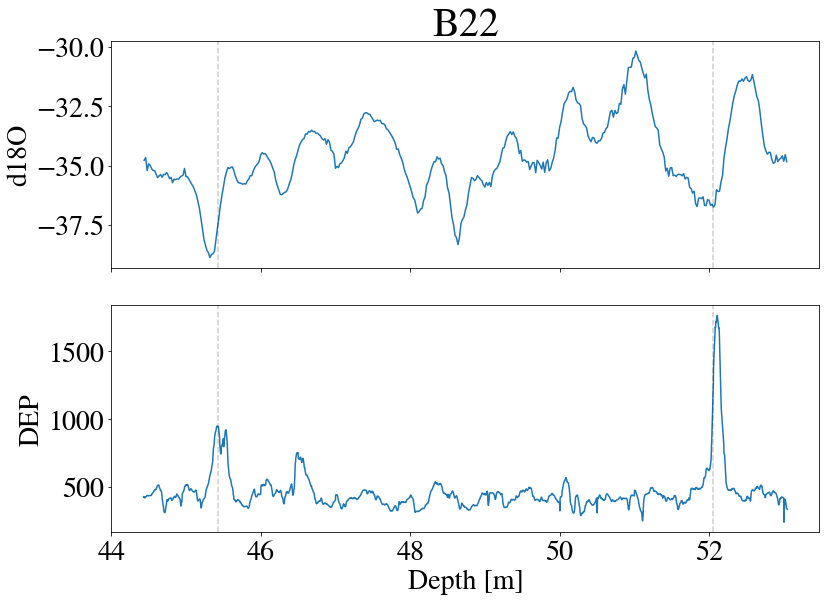

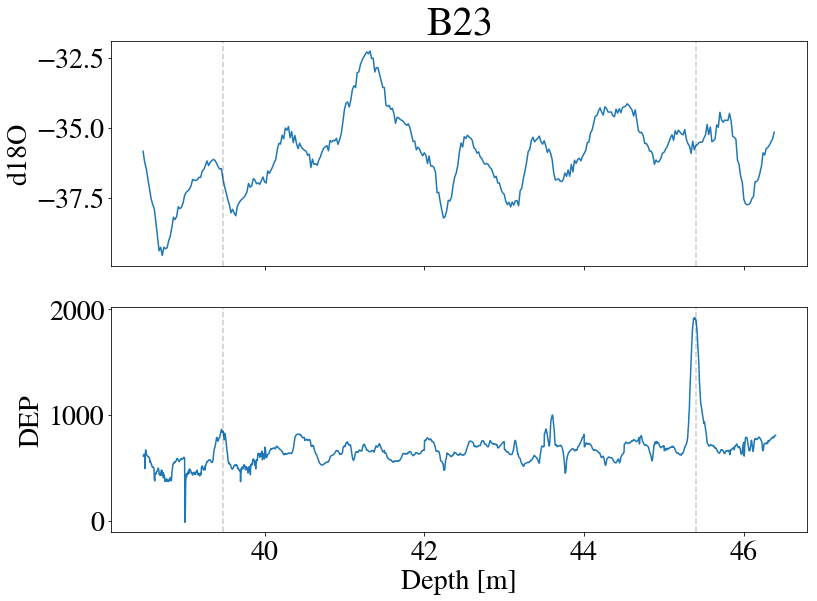

In [3]:
all_dfCores_LakiTambora = []
all_dfCoresPlot = []
all_dfDiffs = []

for i in range(len(ECM_DEPCores)):
    all_dfCores_LakiTambora.append(ECM_DEPCores[i].getData_LakiToTambora(saveFig=False))
    all_dfCoresPlot.append(ECM_DEPCores[i].plotCore(plotFig=False,saveFig=False))
    volcDepth1 = ECM_DEPCores[i].volcIceDepth()[1]
    volcDepth2 = ECM_DEPCores[i].volcIceDepth()[2]
    
    all_dfDiffs.append(ECM_DEPCores[i].SampleResolution( [volcDepth1, volcDepth2]))
  

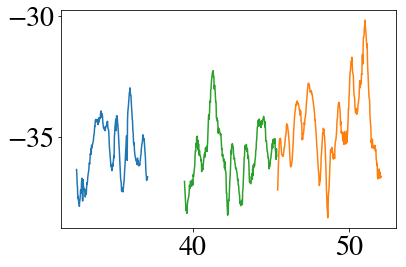

In [4]:
for idx in range(len(all_dfCores_LakiTambora)):
    plt.plot(all_dfCores_LakiTambora[idx][0]['depth'],all_dfCores_LakiTambora[idx][0]['d18O'])

In [12]:
depth_B19 = np.asarray(all_dfCores_LakiTambora[0][0]['depth'])
d18O_B19 = np.asarray(all_dfCores_LakiTambora[0][0]['d18O'])

depth_B22 = np.asarray(all_dfCores_LakiTambora[1][0]['depth'])
d18O_B22 = np.asarray(all_dfCores_LakiTambora[1][0]['d18O'])

depth_B23 = np.asarray(all_dfCores_LakiTambora[2][0]['depth'])
d18O_B23 = np.asarray(all_dfCores_LakiTambora[2][0]['d18O'])

pd.DataFrame(np.array([depth_B19, d18O_B19]).T).to_csv('CSV_files/B19__LT.txt', header=['depth', 'd18O'])
pd.DataFrame(np.array([depth_B22, d18O_B22]).T).to_csv('CSV_files/B22__LT.txt', header=['depth', 'd18O'])
pd.DataFrame(np.array([depth_B23, d18O_B23]).T).to_csv('CSV_files/B23__LT.txt', header=['depth', 'd18O'])

In [10]:
np.array([depth_B22,d18O_B22]).T

array([[ 45.44  , -37.1849],
       [ 45.46  , -36.68  ],
       [ 45.48  , -36.2841],
       [ 45.5   , -35.9217],
       [ 45.52  , -35.529 ],
       [ 45.54  , -35.2892],
       [ 45.56  , -35.0874],
       [ 45.58  , -35.1292],
       [ 45.6   , -35.0855],
       [ 45.62  , -35.0557],
       [ 45.64  , -35.2124],
       [ 45.66  , -35.4395],
       [ 45.68  , -35.6105],
       [ 45.7   , -35.7296],
       [ 45.72  , -35.7367],
       [ 45.74  , -35.7522],
       [ 45.76  , -35.7912],
       [ 45.78  , -35.7638],
       [ 45.8   , -35.7813],
       [ 45.82  , -35.6548],
       [ 45.84  , -35.5675],
       [ 45.86  , -35.4278],
       [ 45.88  , -35.4296],
       [ 45.9   , -35.2342],
       [ 45.92  , -35.0899],
       [ 45.94  , -34.9941],
       [ 45.96  , -34.925 ],
       [ 45.98  , -34.8128],
       [ 46.    , -34.5478],
       [ 46.02  , -34.4553],
       [ 46.04  , -34.5178],
       [ 46.06  , -34.4948],
       [ 46.08  , -34.5864],
       [ 46.1   , -34.7117],
       [ 46.12

In [4]:
coreNames_chosen = ['B16','B18','B19','B20','B21','B22','B23']
for i in range(len(all_dfDiffs)):
    print(f'\n\n#-----------------#\n{coreNames_chosen[i]}\n#-----------------#')
    print(f"\nMax sample size: {all_dfDiffs[i][2]}\nMin sample size: {all_dfDiffs[i][3]}")
    print(f'\nUnique sample sizes({len(all_dfDiffs[i][1])}):')
    print(all_dfDiffs[i][1],'\n')




#-----------------#
B16
#-----------------#

Max sample size: 0.55
Min sample size: 0.013

Unique sample sizes(7):
[0.013 0.014 0.015 0.07  0.1   0.45  0.55 ] 



#-----------------#
B18
#-----------------#

Max sample size: 0.1
Min sample size: 0.05

Unique sample sizes(6):
[0.05   0.0555 0.0556 0.09   0.095  0.1   ] 



#-----------------#
B19
#-----------------#

Max sample size: 0.02
Min sample size: 0.02

Unique sample sizes(1):
[0.02] 



#-----------------#
B20
#-----------------#

Max sample size: 0.0304
Min sample size: 0.0285

Unique sample sizes(6):
[0.0285 0.0286 0.0294 0.0295 0.0303 0.0304] 



#-----------------#
B21
#-----------------#

Max sample size: 0.15
Min sample size: 0.05

Unique sample sizes(5):
[0.05   0.09   0.0909 0.13   0.15  ] 



#-----------------#
B22
#-----------------#

Max sample size: 0.02
Min sample size: 0.02

Unique sample sizes(1):
[0.02] 



#-----------------#
B23
#-----------------#

Max sample size: 0.02
Min sample size: 0.02

Unique sample

In [5]:
all_LTdepths = []
for i in range(len(ECM_DEPCores)):
    all_LTdepths.append(ECM_DEPCores[i].volcIceDepth()[1:3])
    print(all_LTdepths[i][1] - all_LTdepths[i][0])

6.650000000000006
4.830000000000005
4.57
4.3799999999999955
5.140000000000001
6.619999999999997
5.920000000000002


In [6]:
all_LTdepths


[array([43.05, 49.7 ]),
 array([35.69, 40.52]),
 array([32.57, 37.14]),
 array([32.53, 36.91]),
 array([36.07, 41.21]),
 array([45.43, 52.05]),
 array([39.48, 45.4 ])]